In [330]:
import eikon as eikon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import datetime as dt
from matplotlib.ticker import FuncFormatter
from functools import partial

In [331]:
%matplotlib notebook

In [332]:
 eikon.set_app_key('1153655a813e49b09943821a11d273d879402478')

In [333]:
rics = ['EDcm1', 'EDcm2', 'EDcm3', 'EDcm4', 'EDcm5', 'EDcm6', 'EDcm7', 'EDcm8', 'EDcm9', 'EDcm10', 'EDcm11', 'EDcm12']

In [334]:
table_1993_1 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '1993-01-01', end_date = '1993-04-06' , interval = 'daily', calendar='native')
table_1993_2 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '1993-04-07', end_date = '1993-12-31' , interval = 'daily', calendar='native')
table_2002_1 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2002-01-01', end_date = '2002-02-05' , interval = 'daily', calendar='native')
table_2002_2 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2002-01-01', end_date = '2002-10-31' , interval = 'daily', calendar='native')
table_2003 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2003-07-01', end_date = '2004-06-30' , interval = 'daily', calendar='native')
table_2016_1 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2016-01-01', end_date = '2016-03-07' , interval = 'daily', calendar='native')
table_2016_2 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2016-01-01', end_date = '2016-11-30' , interval = 'daily', calendar='native')

table = pd.concat([table_1993_1,table_1993_2, table_2002_1,table_2002_2, table_2003, table_2016_1,table_2016_2], ignore_index= False)

In [350]:
#changing everything to yields
Dates = table.index.tolist()
EDcm1 = (100-table['EDcm1']).tolist()
EDcm2 = (100-table['EDcm2']).tolist()
EDcm3 = (100-table['EDcm3']).tolist()
EDcm4 = (100-table['EDcm4']).tolist()
EDcm5 = (100-table['EDcm5']).tolist()
EDcm6 = (100-table['EDcm6']).tolist()
EDcm7 = (100-table['EDcm7']).tolist()
EDcm8 = (100-table['EDcm8']).tolist()
EDcm9 = (100-table['EDcm9']).tolist()
EDcm10 = (100-table['EDcm10']).tolist()
EDcm11 = (100-table['EDcm11']).tolist()
EDcm12 = (100-table['EDcm12']).tolist()


table_r =pd.DataFrame({'Dates':Dates, 'EDcm1': EDcm1, 'EDcm2': EDcm2, 'EDcm3': EDcm3, 'EDcm4': EDcm4,
                      'EDcm5': EDcm5, 'EDcm6': EDcm6,'EDcm7': EDcm7,'EDcm8': EDcm8,
                      'EDcm9': EDcm9,'EDcm10': EDcm10, 'EDcm11': EDcm11,'EDcm12': EDcm12})
table_r = table_r[['Dates','EDcm1', 'EDcm2', 'EDcm3', 'EDcm4', 'EDcm5','EDcm6','EDcm7','EDcm8',
                  'EDcm9', 'EDcm10', 'EDcm11', 'EDcm12']]

table_r

,Dates,EDcm1,EDcm2,EDcm3,EDcm4,EDcm5,EDcm6,EDcm7,EDcm8,EDcm9,EDcm10,EDcm11,EDcm12
0,1993-01-04,3.5600,3.930,4.350,4.970,5.190,5.540,5.840,6.270,6.380,6.640,6.840,7.140
1,1993-01-05,3.5800,3.950,4.370,4.990,5.210,5.560,5.860,6.280,6.380,6.640,6.840,7.140
2,1993-01-06,3.5900,3.960,4.390,5.010,5.230,5.580,5.870,6.280,6.380,6.640,6.840,7.140
3,1993-01-07,3.6200,4.060,4.520,5.140,5.360,5.700,5.990,6.400,6.500,6.760,6.960,7.260
4,1993-01-08,3.5300,3.900,4.350,4.980,5.210,5.580,5.890,6.320,6.440,6.700,6.900,7.200
5,1993-01-11,3.5200,3.870,4.290,4.910,5.140,5.510,5.820,6.250,6.370,6.640,6.840,7.150
6,1993-01-12,3.5200,3.890,4.320,4.930,5.150,5.520,5.830,6.260,6.380,6.650,6.860,7.170
7,1993-01-13,3.5100,3.860,4.270,4.880,5.110,5.480,5.790,6.220,6.340,6.610,6.820,7.130
8,1993-01-14,3.4700,3.780,4.170,4.770,5.010,5.400,5.720,6.160,6.290,6.560,6.770,7.090
9,1993-01-15,3.3600,3.660,4.030,4.620,4.890,5.300,5.640,6.090,6.220,6.500,6.710,7.030


In [336]:
#finding the spread between EDc6 and EDc1
spread_51 = table_r.loc[:,['Dates','EDcm1','EDcm5']]
spread_51['spread'] = spread_51['EDcm5'] - spread_51['EDcm1']

In [337]:
spread_51 = spread_51.set_index(["Dates"])
spread_51.index = pd.to_datetime(spread_51.index)
#removing duplicate index
spread_51 = spread_51.loc[~spread_51.index.duplicated(keep='first')]

In [338]:
#changing the structure of df
spread_51['Year'] = list(map(lambda x: x, spread_51.index.year))
spread_51['Month-Day'] = spread_51.index.strftime('%m-%d')
spread_51a = spread_51.pivot(index='Month-Day', columns='Year', values='spread')
spread_51a[1993].fillna(method='bfill', inplace=True)
spread_51a[2002].fillna(method='bfill', inplace=True)
spread_51a[2003].fillna(method='ffill', inplace=True)
spread_51a[2004].fillna(method='bfill', inplace=True)
spread_51a[2016].fillna(method='bfill', inplace=True)

In [339]:
# replacing outliers with mean rates
#years = [1993, 2002, 2016]

#for x in years:
#    mean = sum(spread_51a[x])/ len(spread_51a[x])    
#    Q1 = spread_51a[x].quantile(0.25)
#    Q3 = spread_51a[x].quantile(0.75)
#    IQR = Q3 - Q1
#    spread_51a[x] = spread_51a[x].mask((spread_51a[x]< (Q1 - 1.5* IQR)) | (spread_51a[x] > (Q3  + 1.5 * IQR)),mean) 
#    spread_51a[x].fillna(method='ffill', inplace= True)
#    spread_51a[x].fillna(method='bfill', inplace= True)

<IPython.core.display.Javascript object>


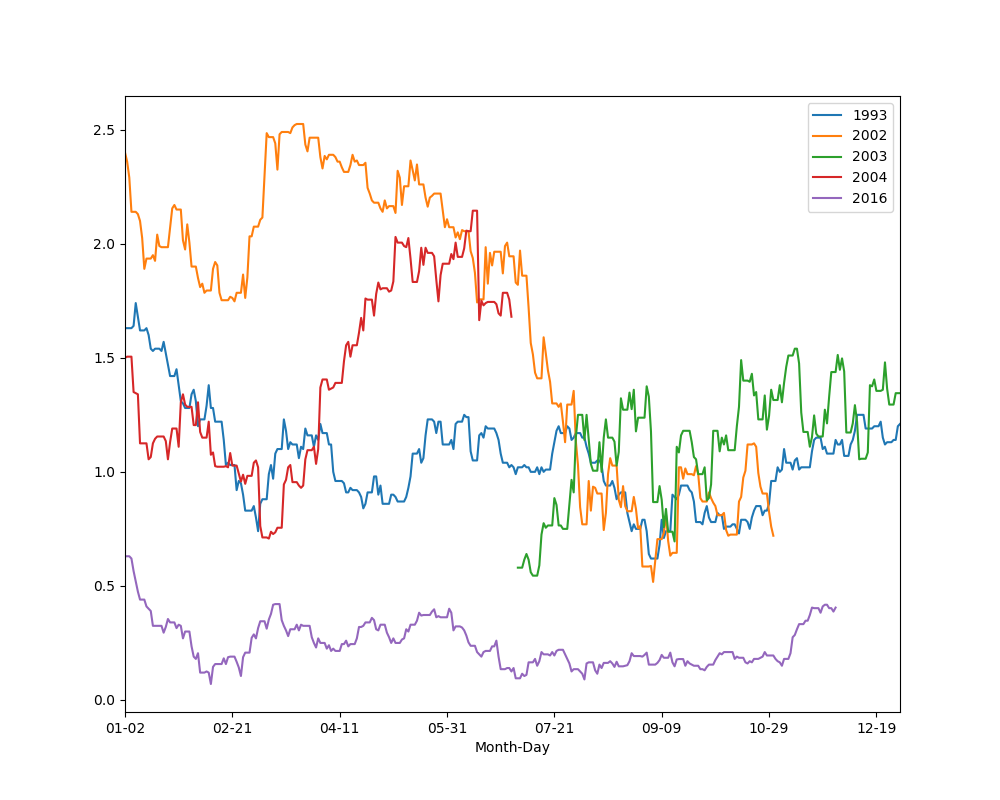

In [340]:
graph = spread_51a.plot(kind='line',figsize=(10,8))
graph.legend(bbox_to_anchor=(1.0,1.0))

In [341]:
#finding the spread between EDcm2 and EDcm6
spread_62 = table_r.loc[:,['Dates','EDcm2','EDcm6']]
spread_62['spread'] = spread_62['EDcm6'] - spread_62['EDcm2']

In [342]:
spread_62 = spread_62.set_index(["Dates"])
spread_62.index = pd.to_datetime(spread_62.index)
#removing duplicate index
spread_62 = spread_62.loc[~spread_62.index.duplicated(keep='first')]

In [343]:
#changing the structure of df
spread_62['Year'] = list(map(lambda x: x, spread_62.index.year))
spread_62['Month-Day'] = spread_62.index.strftime('%m-%d')
spread_62a = spread_62.pivot(index='Month-Day', columns='Year', values='spread')
spread_62a[1993].fillna(method='bfill', inplace=True)
spread_62a[2002].fillna(method='bfill', inplace=True)
spread_62a[2003].fillna(method='ffill', inplace=True)
spread_62a[2004].fillna(method='bfill', inplace=True)
spread_62a[2016].fillna(method='bfill', inplace=True)

In [344]:
# replacing outliers with mean rates
#years = [1993, 2002, 2016]

#for x in years:
#    mean = sum(spread_62a[x])/ len(spread_62a[x])    
#    Q1 = spread_62a[x].quantile(0.25)
#    Q3 = spread_62a[x].quantile(0.75)
#    IQR = Q3 - Q1
#    spread_62a[x] = spread_62a[x].mask((spread_62a[x]< (Q1 - 1.5* IQR)) | (spread_62a[x] > (Q3  + 1.5 * IQR)),mean) 
#    spread_62a[x].fillna(method='ffill', inplace= True)
#    spread_62a[x].fillna(method='bfill', inplace= True)

<IPython.core.display.Javascript object>


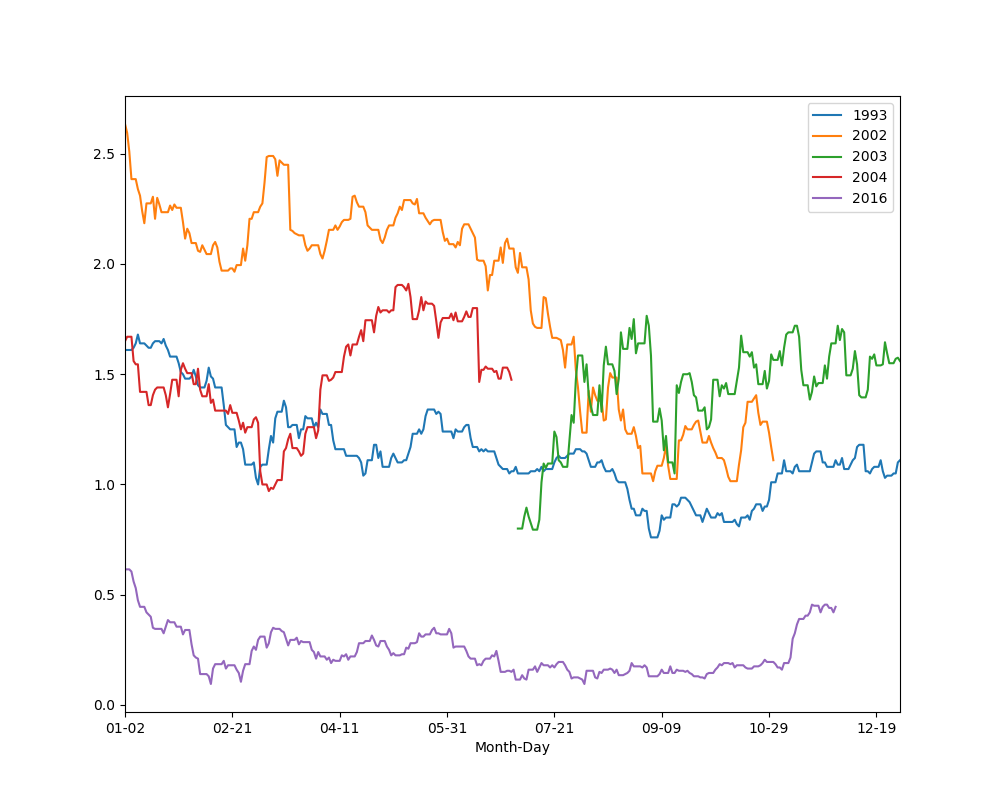

In [345]:
graph2 = spread_62a.plot(kind='line',figsize=(10,8))
graph2.legend(bbox_to_anchor=(1.0,1.0))

In [346]:
spread_21 = table_r.loc[:,['Dates','EDcm1','EDcm2']]
spread_21['spread'] = spread_21['EDcm2'] - spread_21['EDcm1']

In [347]:
spread_21 = spread_21.set_index(["Dates"])
spread_21.index = pd.to_datetime(spread_21.index)
#removing duplicate index
spread_21 = spread_21.loc[~spread_21.index.duplicated(keep='first')]

In [348]:
#changing the structure of df
spread_21['Year'] = list(map(lambda x: x, spread_21.index.year))
spread_21['Month-Day'] = spread_21.index.strftime('%m-%d')
spread_21a = spread_51.pivot(index='Month-Day', columns='Year', values='spread')
spread_21a[1993].fillna(method='bfill', inplace=True)
spread_21a[2002].fillna(method='bfill', inplace=True)
spread_21a[2003].fillna(method='ffill', inplace=True)
spread_21a[2004].fillna(method='bfill', inplace=True)
spread_21a[2016].fillna(method='bfill', inplace=True)

<IPython.core.display.Javascript object>


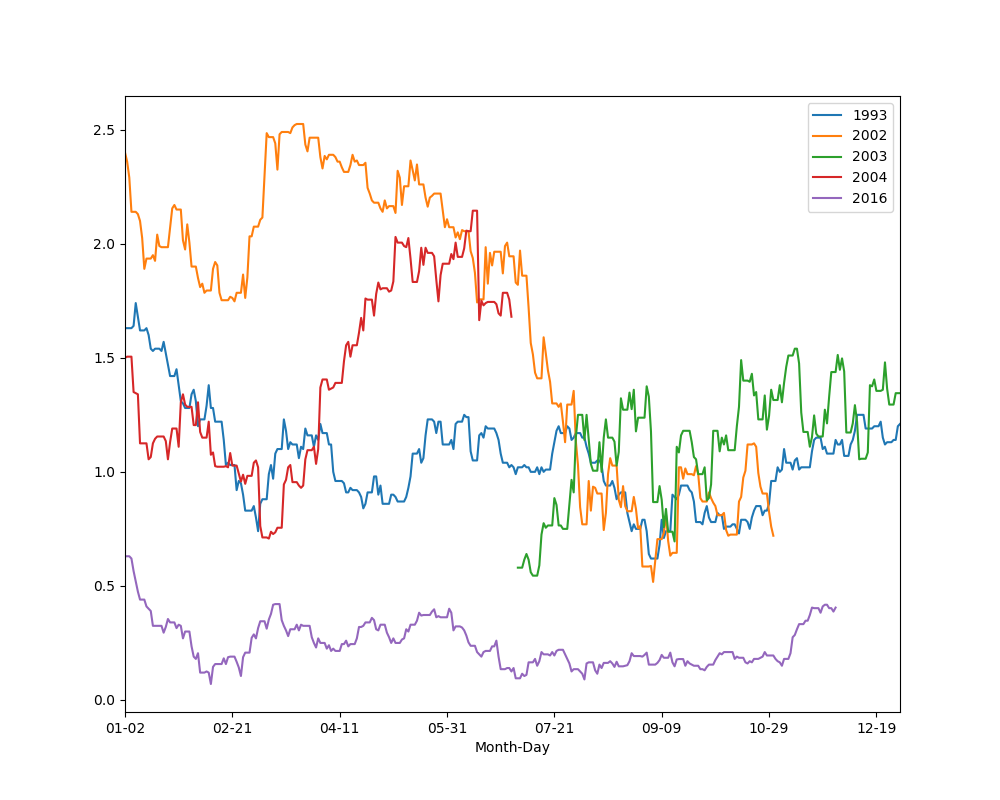

In [349]:
graph3 = spread_21a.plot(kind='line',figsize=(10,8))
graph3.legend(bbox_to_anchor=(1.0,1.0))

In [351]:
table_r = table_r.set_index(["Dates"])

In [391]:
spreads_1993 = table_r.loc["1993-01-04":"1993-12-31", ["EDcm1","EDcm2", "EDcm5", "EDcm6"]]
spreads_1993['EDcm5/EDcm1'] = spreads_19931['EDcm5'] - spreads_19931['EDcm1']
spreads_1993['EDcm6/EDcm2'] = spreads_19931['EDcm6'] - spreads_19931['EDcm2']
spreads_1993['EDcm2/EDcm1'] = spreads_19931['EDcm2'] - spreads_19931['EDcm1']

<IPython.core.display.Javascript object>


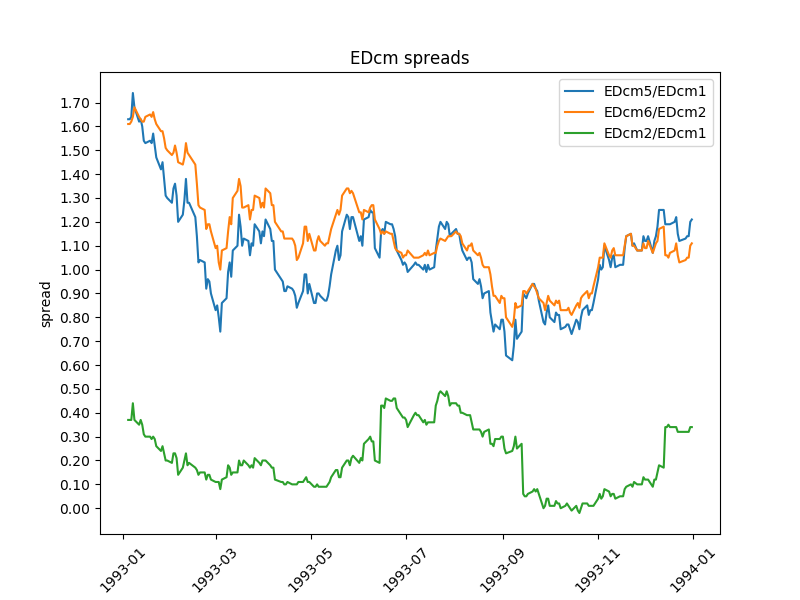

In [405]:
fig1, ax1 = plt.subplots(1,1, figsize=(8, 6))

ax1.plot(spreads_1993.index,spreads_1993['EDcm5/EDcm1'])
ax1.plot(spreads_1993.index,spreads_1993['EDcm6/EDcm2'])
ax1.plot(spreads_1993.index,spreads_1993['EDcm2/EDcm1'])

ax1.legend(bbox_to_anchor=(1.0,1.0))
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

ax1.title.set_text('EDcm spreads')

ax1.set_xlabel('Dates')

ax1.set_ylabel('spread')
ax1.set_yticks(np.arange(0,1.75,0.10))

y_vals1 = ax1.get_yticks()
ax1.set_yticklabels(['{:3.2f}'.format(x) for x in y_vals1])
#ax10.boxplot(table_61['spread'], vert = False)

In [406]:
spreads_2002 = table_r.loc["2002-01-02":"2002-10-31", ["EDcm1","EDcm2", "EDcm5", "EDcm6"]]
spreads_2002['EDcm5/EDcm1'] = spreads_2002['EDcm5'] - spreads_2002['EDcm1']
spreads_2002['EDcm6/EDcm2'] = spreads_2002['EDcm6'] - spreads_2002['EDcm2']
spreads_2002['EDcm2/EDcm1'] = spreads_2002['EDcm2'] - spreads_2002['EDcm1']
spreads_2002 = spreads_2002.loc[~spreads_2002.index.duplicated(keep='first')]
spreads_2002

,EDcm1,EDcm2,EDcm5,EDcm6,EDcm5/EDcm1,EDcm6/EDcm2,EDcm2/EDcm1
Dates,,,,,,,
2002-01-02,2.035,2.435,4.435,5.070,2.400,2.635,0.400
2002-01-03,2.000,2.410,4.360,5.005,2.360,2.595,0.410
2002-01-04,2.000,2.420,4.290,4.930,2.290,2.510,0.420
2002-01-07,1.930,2.310,4.070,4.695,2.140,2.385,0.380
2002-01-08,1.940,2.335,4.070,4.675,2.130,2.340,0.395
2002-01-09,1.940,2.315,4.040,4.625,2.100,2.310,0.375
2002-01-10,1.920,2.285,3.945,4.525,2.025,2.240,0.365
2002-01-11,1.775,2.075,3.665,4.260,1.890,2.185,0.300
2002-01-14,1.775,2.045,3.710,4.320,1.935,2.275,0.270


<IPython.core.display.Javascript object>


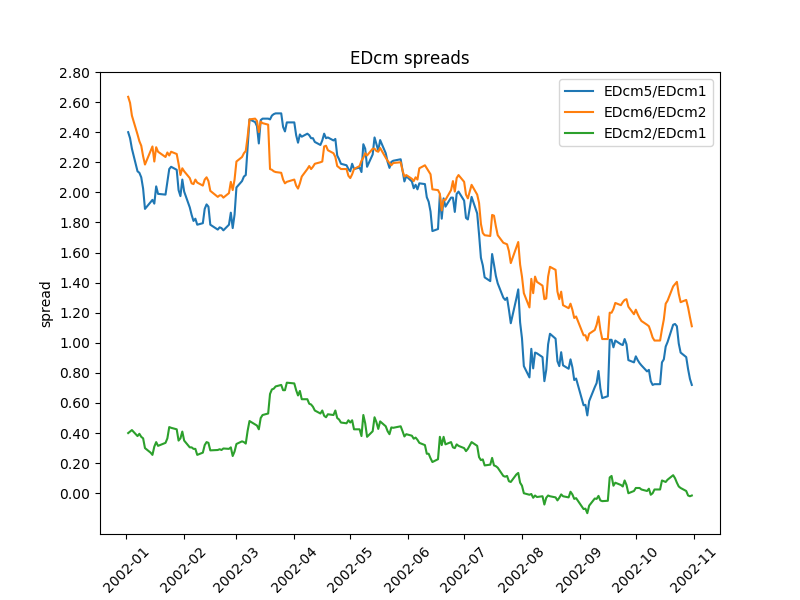

In [402]:
fig2, ax2 = plt.subplots(1,1, figsize=(8, 6))

ax2.plot(spreads_2002.index,spreads_2002['EDcm5/EDcm1'])
ax2.plot(spreads_2002.index,spreads_2002['EDcm6/EDcm2'])
ax2.plot(spreads_2002.index,spreads_2002['EDcm2/EDcm1'])

ax2.legend(bbox_to_anchor=(1.0,1.0))

ax2.title.set_text('EDcm spreads')

ax2.set_xlabel('Dates')

for tick in ax2.get_xticklabels():
    tick.set_rotation(45)

ax2.set_ylabel('spread')
ax2.set_yticks(np.arange(0,3.0,0.2))

y_vals2 = ax2.get_yticks()
ax2.set_yticklabels(['{:3.2f}'.format(x) for x in y_vals2])

In [407]:
spreads_2003 = table_r.loc["2003-07-01":"2004-06-30", ["EDcm1","EDcm2", "EDcm5", "EDcm6"]]
spreads_2003['EDcm5/EDcm1'] = spreads_2003['EDcm5'] - spreads_2003['EDcm1']
spreads_2003['EDcm6/EDcm2'] = spreads_2003['EDcm6'] - spreads_2003['EDcm2']
spreads_2003['EDcm2/EDcm1'] = spreads_2003['EDcm2'] - spreads_2003['EDcm1']
spreads_2003 = spreads_2003.loc[~spreads_2003.index.duplicated(keep='first')]
spreads_2003

,EDcm1,EDcm2,EDcm5,EDcm6,EDcm5/EDcm1,EDcm6/EDcm2,EDcm2/EDcm1
Dates,,,,,,,
2003-07-03,1.0700,1.125,1.650,1.925,0.5800,0.800,0.0550
2003-07-07,1.0750,1.125,1.690,1.980,0.6150,0.855,0.0500
2003-07-08,1.0850,1.140,1.725,2.035,0.6400,0.895,0.0550
2003-07-09,1.0850,1.140,1.700,1.995,0.6150,0.855,0.0550
2003-07-10,1.0700,1.110,1.630,1.935,0.5600,0.825,0.0400
2003-07-11,1.0650,1.110,1.610,1.905,0.5450,0.795,0.0450
2003-07-14,1.0650,1.115,1.655,1.955,0.5900,0.840,0.0500
2003-07-15,1.0850,1.145,1.810,2.155,0.7250,1.010,0.0600
2003-07-16,1.0850,1.145,1.860,2.240,0.7750,1.095,0.0600


<IPython.core.display.Javascript object>


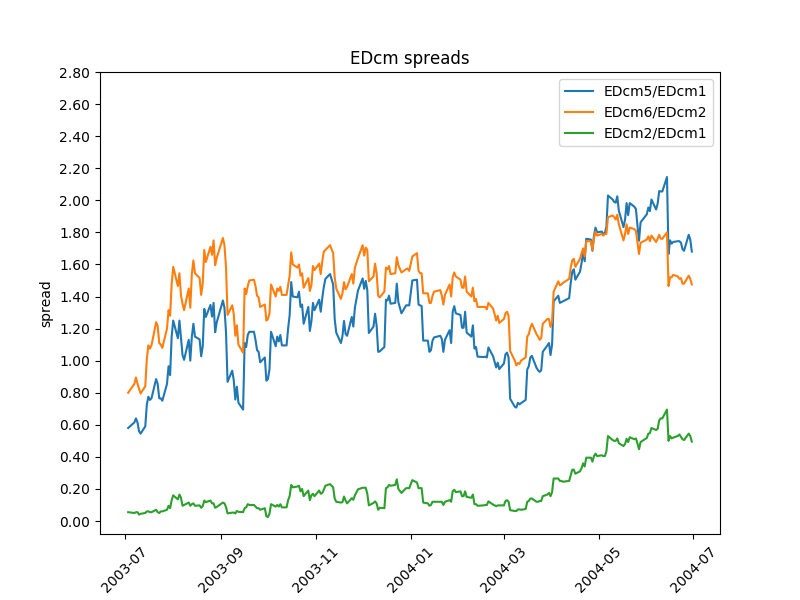

In [404]:
fig3, ax3 = plt.subplots(1,1, figsize=(8, 6))

ax3.plot(spreads_2003.index,spreads_2003['EDcm5/EDcm1'])
ax3.plot(spreads_2003.index,spreads_2003['EDcm6/EDcm2'])
ax3.plot(spreads_2003.index,spreads_2003['EDcm2/EDcm1'])

ax3.legend(bbox_to_anchor=(1.0,1.0))

ax3.title.set_text('EDcm spreads')

ax3.set_xlabel('Dates')

for tick in ax3.get_xticklabels():
    tick.set_rotation(45)

ax3.set_ylabel('spread')
ax3.set_yticks(np.arange(0,3.0,0.2))

y_vals3 = ax3.get_yticks()
ax3.set_yticklabels(['{:3.2f}'.format(x) for x in y_vals3])
#ax10.boxplot(table_61['spread'], vert = False)